# Espectrograma




In [1]:
import numpy as np
from scipy import signal
from scipy import fft
from scipy.io import wavfile
import matplotlib
import matplotlib.pyplot as plt
import math
import warnings; warnings.simplefilter('ignore') # Para quitar mensajes de warning
import upv_audio 
matplotlib.rcParams['figure.figsize'] = (15.0, 7.5)

In [2]:
#La idea del espectrograma es ir calculando espectros de diferentes fragmentos de señal

#![](images/sliding_dft.gif)

In [3]:
#fs,audio=upv_audio.read('audios/guitarra/afinadas_y_separadas.wav')
fs,audio=upv_audio.read('audios/guitarra/seis_cuerdas_8k.wav')

In [4]:
def espectrograma(x,fs,win_length_sg):
    '''
    def espectrograma(x,fs,win_length_sg):
    Returns 
      * spectrogram: 0:fs/2
      * frequency vector (hz)
      * time vector (sg)
    '''
    winlength_samples = int(win_length_sg*fs)
    NFFT=int(2**math.ceil(math.log2(2*winlength_samples)))
    avance = winlength_samples //4
    ventana = signal.hamming(winlength_samples)
    
    inicio = 0
    fin = inicio + winlength_samples
    
    lx=len(x)
    
    freq=np.arange(NFFT//2)/float(NFFT)*fs
    Ts=1.0/fs
    
    centros =[]
    espectros=[]
    while fin <=lx:
        centro =(inicio+fin)//2
        centros.append(centro)
        X=fft.fft(x[inicio:fin]*ventana,NFFT)
        X=np.absolute(X[:NFFT//2])**2.0
       
        espectros.append(X)
        inicio += avance
        fin +=avance

    e = np.column_stack(espectros)    
    centros = np.array(centros)*Ts
    return e,freq,centros

(2048, 720) (2048,) (720,)


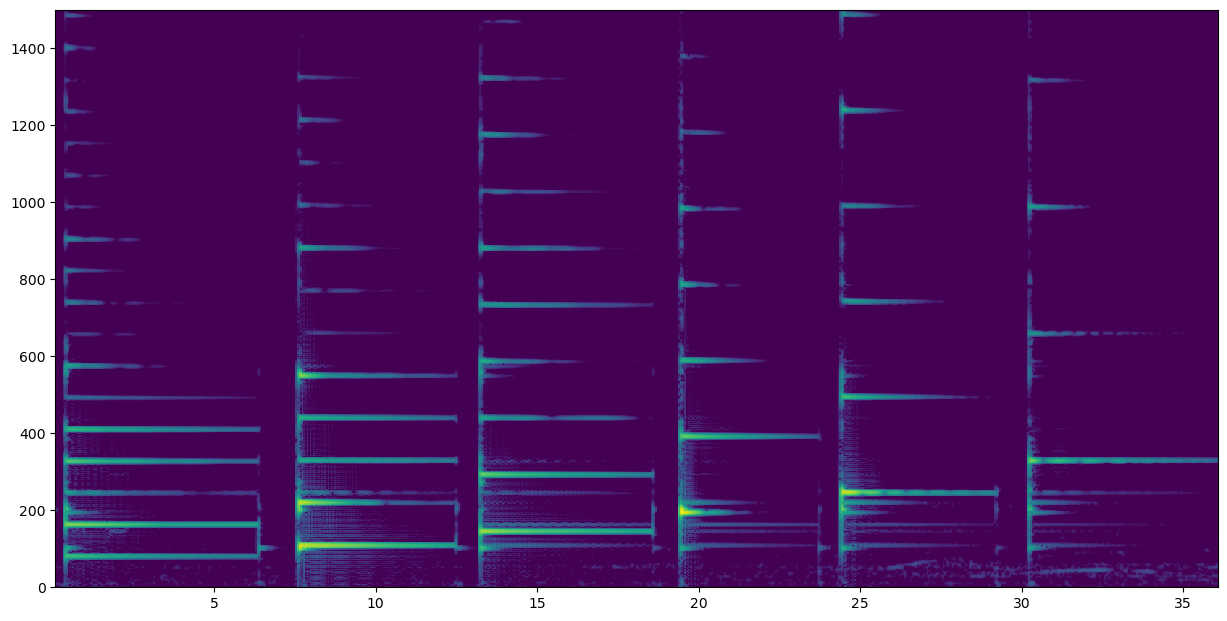

In [5]:
A,f,t=espectrograma(audio,fs,0.2)
print(A.shape,f.shape,t.shape)
plt.pcolor(t,f,10*np.log10(A[:,:]))
plt.ylim(0,1500)
maxx=np.max(10*np.log10(A))

plt.clim(maxx-70,maxx)

In [6]:
fs2,audio2=upv_audio.read('audios/guitarra/acorde-arpegio_8k.wav')

(2048, 553) (2048,) (553,)


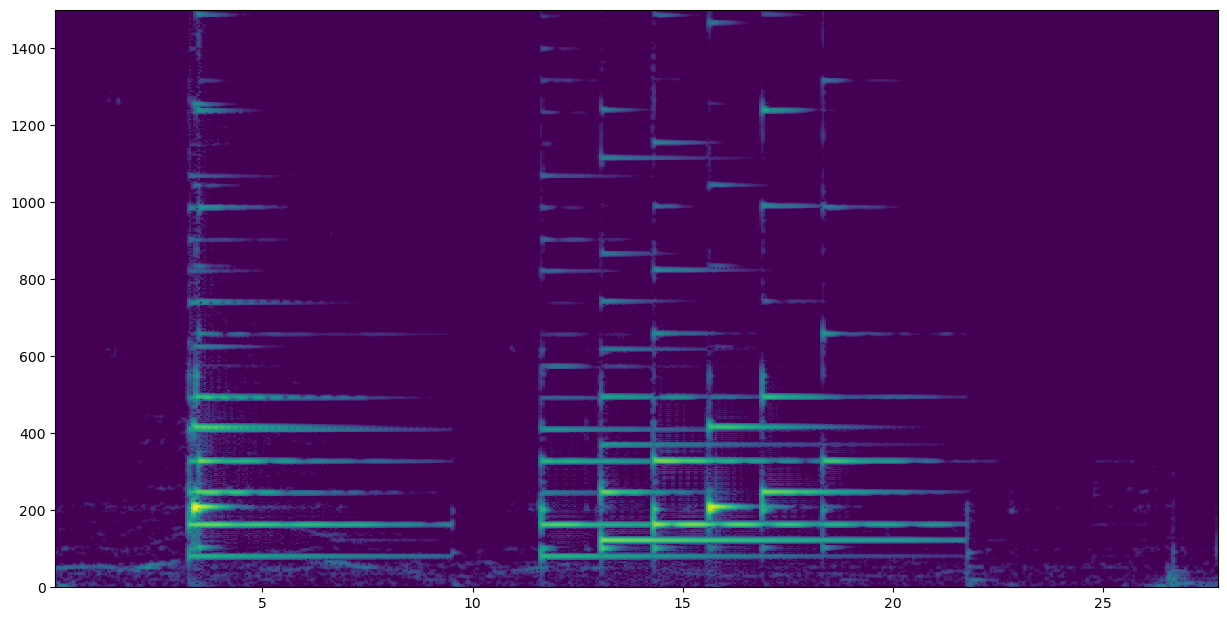

In [7]:
A2,f2,t2=espectrograma(audio2,fs2,0.2)
print(A2.shape,f2.shape,t2.shape)
plt.pcolor(t2,f2,10*np.log10(A2[:,:]))
plt.ylim(0,1500)

maxx=np.max(10*np.log10(A2))
plt.clim(maxx-70,maxx)

Se recomienda escuchar este archivo par ver la diferencia entre acorde y arpegio

# Espectrograma de la voz

In [8]:
fs,voz=upv_audio.read('audios/holas.wav')

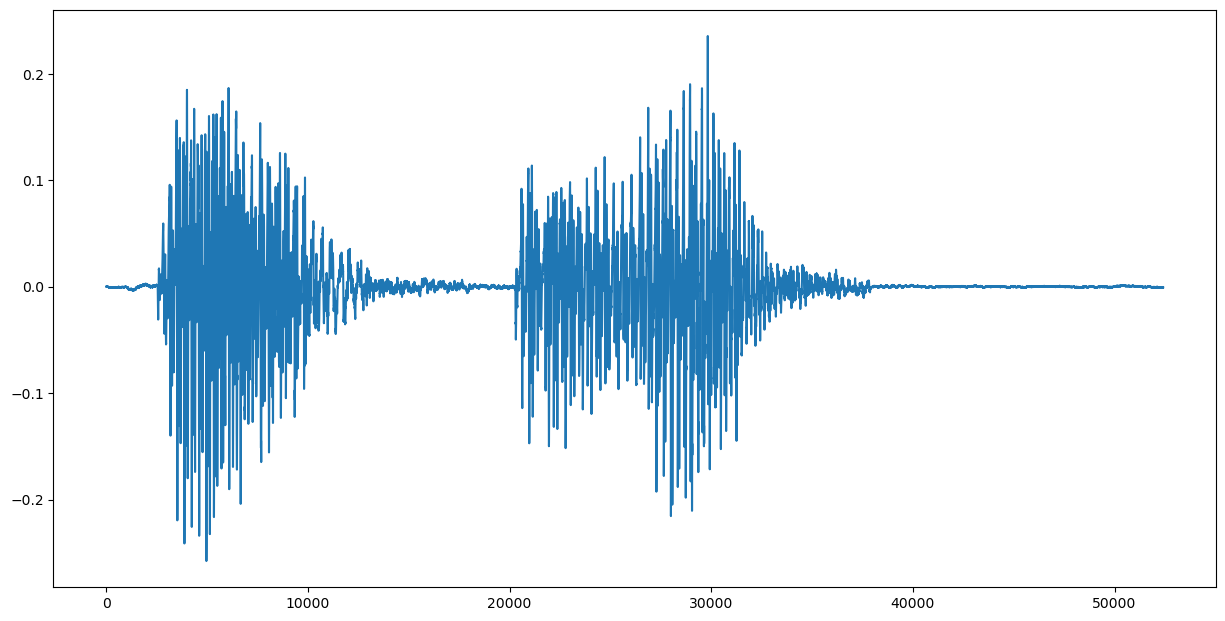

In [9]:
# Primero veamos la señal en el tiempo
_=plt.plot(voz)

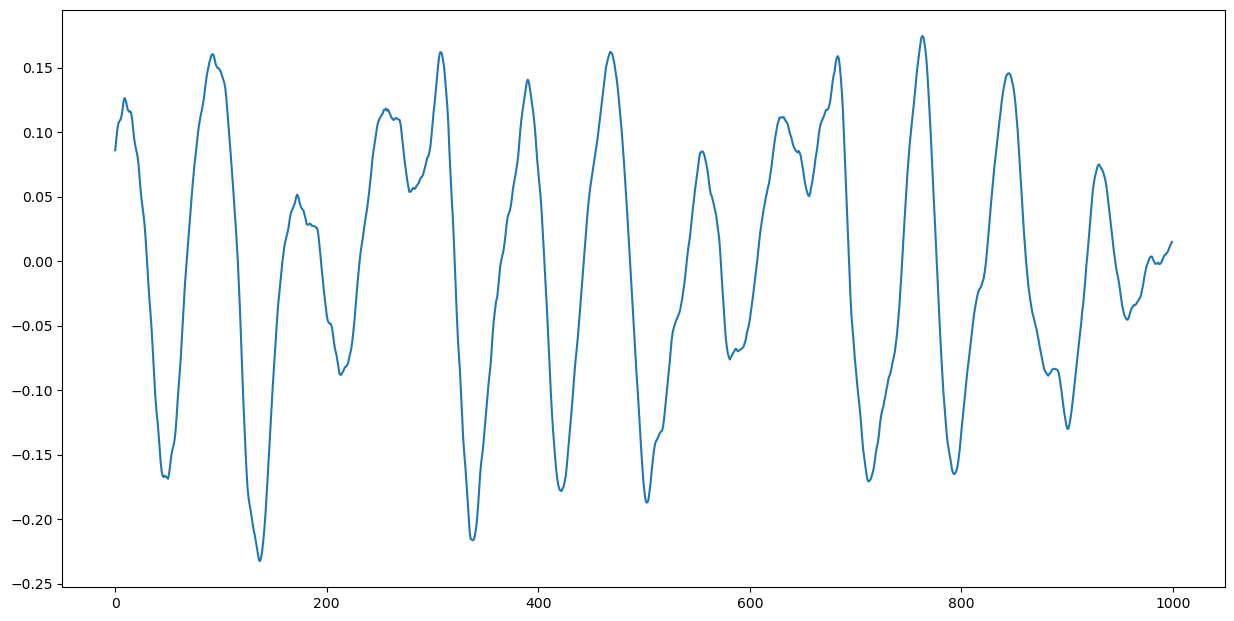

In [10]:
# Veamos un detalle para ver periodicidad
%matplotlib inline
plt.plot(voz[5000:6000])

In [11]:
A3,f3,t3=espectrograma(voz,fs,40e-3)

(2048, 115) (2048,) (115,)


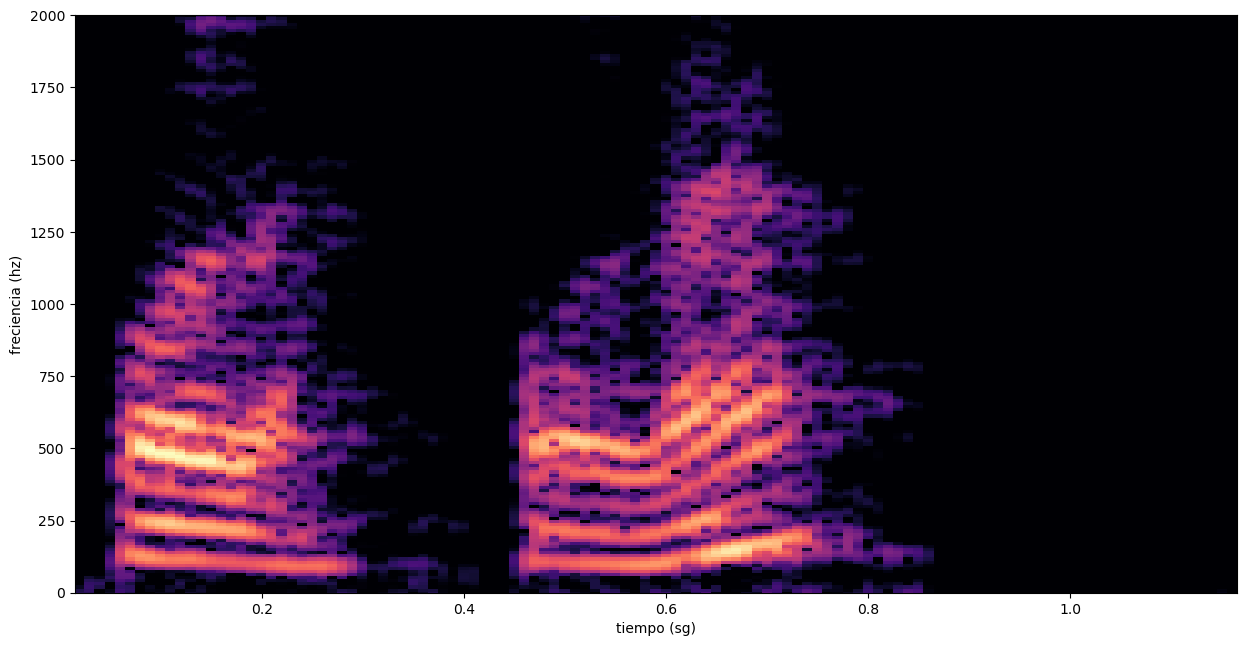

In [12]:
print(A3.shape,f3.shape,t3.shape)
_=plt.pcolor(t3,f3,10*np.log10((A3[:,:])),cmap='magma')
_=plt.ylim(0,2000)
_=plt.xlabel('tiempo (sg)')
_=plt.ylabel('freciencia (hz)')
maxx=np.max(10*np.log10(A3))
plt.clim(maxx-40,maxx)

**Observaciones**
* Las líneas que se ven corresponden a picos de espectro
* Picos de espectro: periodicidades Cuerdas vocales!!
* En hombres aprox. 100 hz. En mujeres aprox 200 hz.
* La envolvente espectral: qué sonido se dice
* El patrón de variación del pitch:
  * firma biométrica?
  * Entonación de la frase. El segundo "hola" es interrogativo